<a href="https://colab.research.google.com/github/munawarali93/NASA-Near-Earth-Objects/blob/main/NASA_near_earth_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mentor:
Kashif bari

##Team members:
1. Munawar Ali
2. Cagatay Ayhan
3. Ece KARACAM
4. Mostofa Hisham
5. Waleed Ahmed

Near-Earth Objects (NEOs) are comets and asteroids that have been nudged by the gravitational attraction of nearby planets into orbits that allow them to enter the Earth’s neighborhood. As they orbit the Sun, Near-Earth Objects occasionally approach close to Earth. We plan to develop several models for detecting whether or not a NEO is hazardous. We will likely use the data provided here: https://www.kaggle.com/datasets/sameepvani nasa-nearest-earth-objects/data
Sources: https://api.nasa.gov
https://cneos.jpl.nasa.gov/ca/

##Basic Modules

In [ ]:
!git clone https://github.com/munawarali93/NASA-Near-Earth-Objects

Cloning into 'NASA-Near-Earth-Objects'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 23 (delta 4), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (23/23), 4.83 MiB | 6.88 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
! ls -l

total 8
drwxr-xr-x 3 root root 4096 Nov 17 23:44 NASA-Near-Earth-Objects
drwxr-xr-x 1 root root 4096 Nov 16 14:27 sample_data


In [ ]:
path = r'/content/drive/MyDrive/NASA_near_earth_objects'

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import keras
import tensorflow as tf

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics as ks_metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Data

In [ ]:
nasa = pd.read_csv("/content/drive/MyDrive/NASA_near_earth_objects/neo.csv.zip")
print(nasa.shape)
nasa['average_diameter'] = (nasa['est_diameter_max'] + nasa['est_diameter_min'])/2

(90836, 10)


In [ ]:
nasa = nasa.drop(columns = ['orbiting_body','sentry_object', 'id', 'name']).copy()

In [ ]:
nasa['hazardous'] = nasa['hazardous'].replace({True: 1, False: 0})
nasa.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,average_diameter
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0,1.938843
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1,0.430073
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0,1.168268
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0,0.156150
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1,0.412613


In [ ]:
nasa.isnull().values.any()

False

In [ ]:
y = nasa['hazardous'].copy()
X = nasa.drop('hazardous', axis=1).copy()
y.shape

(90836,)

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,average_diameter
0,3.587284,3.587284,-1.363913,0.795153,-2.348632,3.587284
1,0.463529,0.463529,1.009040,1.090357,-1.218735,0.463529
2,1.991887,1.991887,2.616983,0.569624,-1.968544,1.991887
3,-0.103601,-0.103601,-0.921301,-0.520384,-0.458560,-0.103601
4,0.427378,0.427378,-0.210697,0.412001,-1.187637,0.427378


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

##Preprocessing

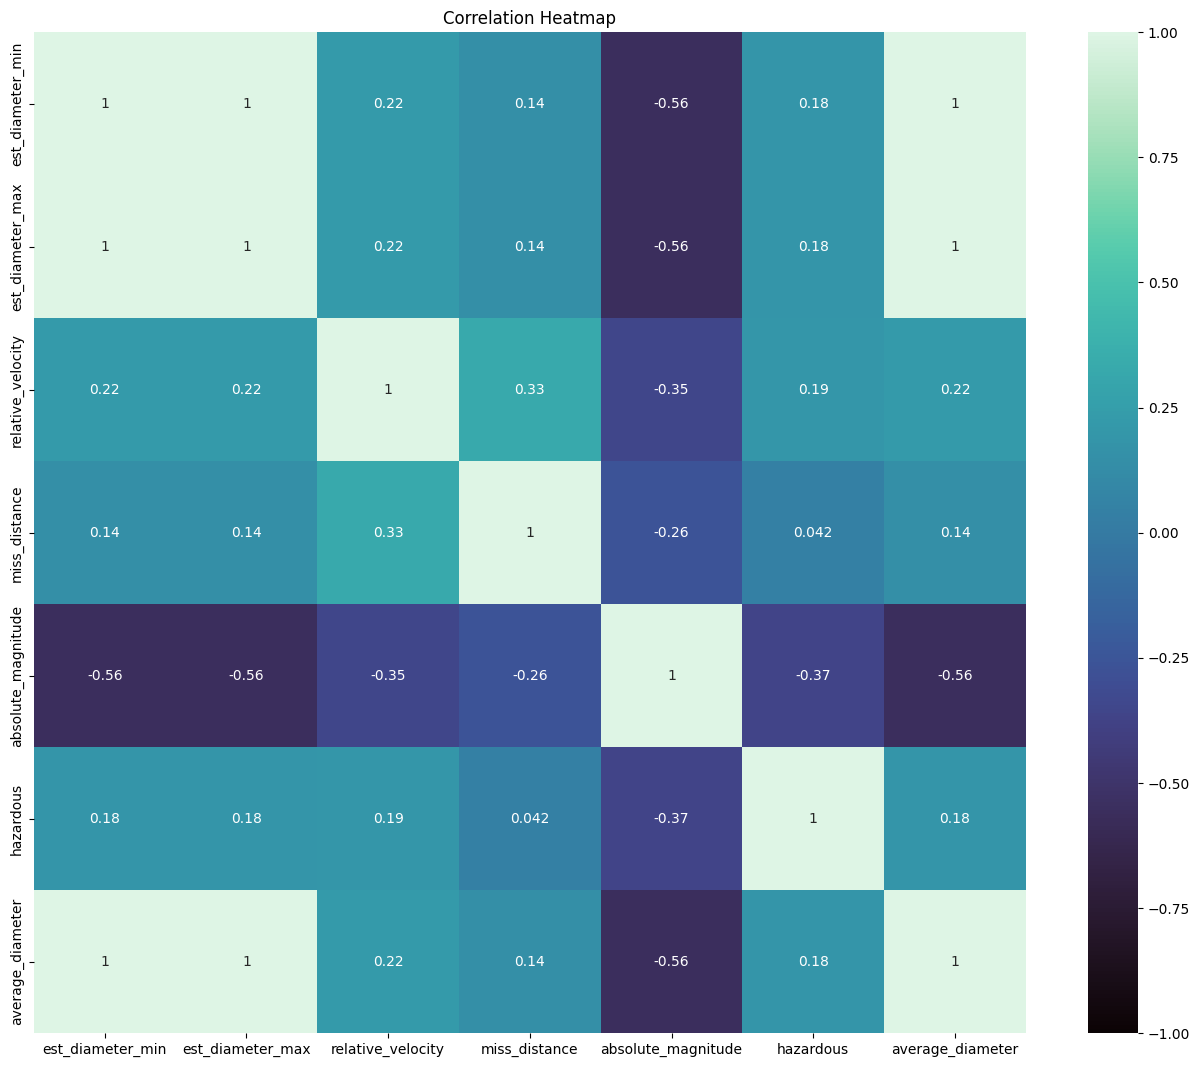

In [ ]:
corr = nasa.corr()
plt.figure(figsize=(16, 13))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

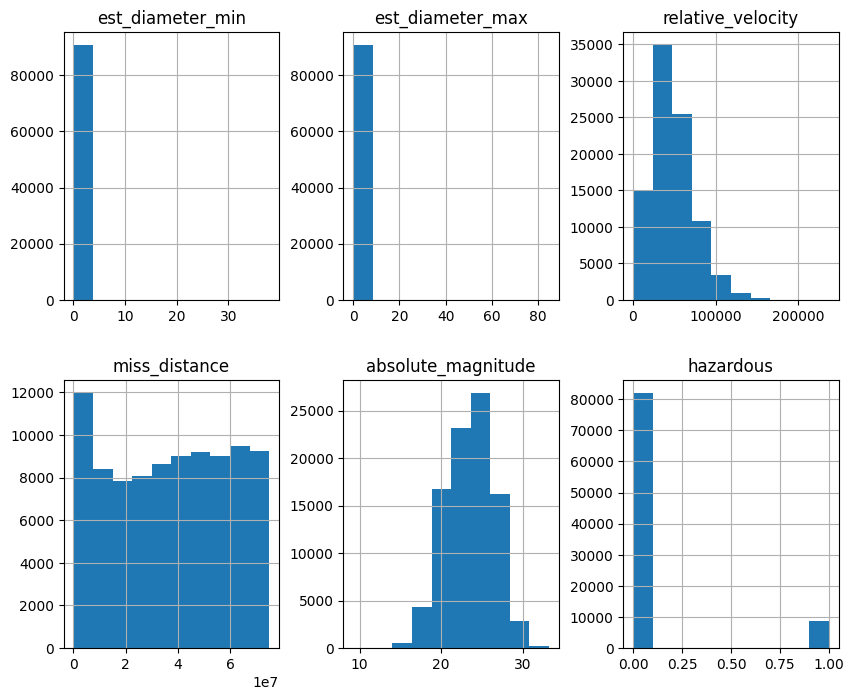

In [ ]:
from itertools import combinations

fig, axes = plt.subplots(len(nasa.columns)//3, 3, figsize=(10, 8))

i = 0
for triaxis in axes:
    for axis in triaxis:
        nasa.hist(column = nasa.columns[i], bins = 10, ax=axis)
        i = i+1

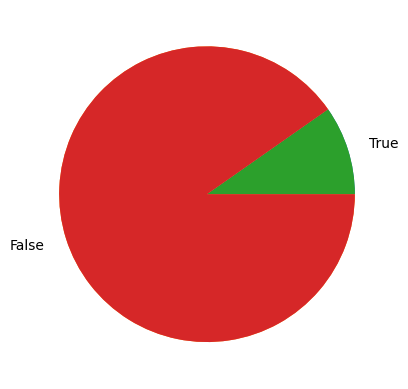

True Percentage: 9.7318 %
False Percentage: 90.2682 %


In [ ]:
names='True', 'False',
t = y.sum()
f = len(y) - t
values=[t,f]
plt.pie(values)
plt.pie(values, labels=names, labeldistance=1.15);
plt.show()
print("True Percentage:", round(t/len(y)*100, 4), "%")
print("False Percentage:", round(f/len(y)*100, 4), "%")

##XGBoost

In [ ]:
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import os

In [ ]:
xgboost.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
xgb = xgboost.XGBClassifier(learning_rate = 0.01,
                            max_depth = 7,
                            n_estimators = 1000,
                            subsample = 0.5,
                            colsample_bytree = 0.5,
                            eval_metric = 'auc',
                            verbosity = 1)

eval_set = [(X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds=200, eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.90043
[1]	validation_0-auc:0.90169
[2]	validation_0-auc:0.90870
[3]	validation_0-auc:0.90942
[4]	validation_0-auc:0.91143
[5]	validation_0-auc:0.91190
[6]	validation_0-auc:0.91202
[7]	validation_0-auc:0.91329
[8]	validation_0-auc:0.91389


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.91409
[10]	validation_0-auc:0.91442
[11]	validation_0-auc:0.91455
[12]	validation_0-auc:0.91435
[13]	validation_0-auc:0.91463
[14]	validation_0-auc:0.91460
[15]	validation_0-auc:0.91471
[16]	validation_0-auc:0.91478
[17]	validation_0-auc:0.91474
[18]	validation_0-auc:0.91501
[19]	validation_0-auc:0.91541
[20]	validation_0-auc:0.91555
[21]	validation_0-auc:0.91545
[22]	validation_0-auc:0.91551
[23]	validation_0-auc:0.91560
[24]	validation_0-auc:0.91556
[25]	validation_0-auc:0.91557
[26]	validation_0-auc:0.91553
[27]	validation_0-auc:0.91573
[28]	validation_0-auc:0.91591
[29]	validation_0-auc:0.91594
[30]	validation_0-auc:0.91619
[31]	validation_0-auc:0.91619
[32]	validation_0-auc:0.91619
[33]	validation_0-auc:0.91609
[34]	validation_0-auc:0.91606
[35]	validation_0-auc:0.91599
[36]	validation_0-auc:0.91604
[37]	validation_0-auc:0.91604
[38]	validation_0-auc:0.91616
[39]	validation_0-auc:0.91614
[40]	validation_0-auc:0.91620
[41]	validation_0-auc:0.91621
[42]	valida

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

##Performance Evaluation

In [ ]:
y_train_pred = xgb.predict_proba(X_train)[:,1]
y_test_pred = xgb.predict_proba(X_test)[:,1]
print("AUC Train: {:.4f} \nAUC Test: {:.4f}".format(roc_auc_score(y_train, y_train_pred), roc_auc_score(y_test, y_test_pred)))

AUC Train: 0.9410 
AUC Test: 0.9225


In [ ]:
from sklearn.metrics import accuracy_score
ylabel = xgb.predict(X_train)
ytlabel = xgb.predict(X_test)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_train, ylabel)
accuracyt = accuracy_score(y_test, ytlabel)
print("Train Accuracy:", accuracy)
print("Test Accuracy:", accuracyt)

Train Accuracy: 0.9187400231188418
Test Accuracy: 0.9116028181417878


##Hyperparameter Tuning

In [ ]:
learning_rate_list = [0.01, 0.02, 0.05, 0.1, 0.5, 1]
max_depth_list = [2,5,7,10]
n_estimators_list = [10, 200, 500, 1000, 2000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list
               }

num_combinations  = 1
for v in params_dict.values(): num_combinations *= len(v)
print(num_combinations)
params_dict

120


{'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.5, 1],
 'max_depth': [2, 5, 7, 10],
 'n_estimators': [10, 200, 500, 1000, 2000]}

In [ ]:
def my_roc_auc_score(model, X, y):
  return roc_auc_score(y, model.predict_proba(X)[:,1])

xgb_hyper = GridSearchCV(estimator = xgboost.XGBClassifier(subsample = 0.5,
                                                           colsample=0.25,
                                                           eval_metric='auc',
                                                           use_label_encoder=False),
                         param_grid=params_dict,
                         cv=2,
                         scoring=my_roc_auc_score,
                         return_train_score=True,
                         verbose=4)

xgb_hyper.fit(X_train, y_train)

Fitting 2 folds for each of 120 candidates, totalling 240 fits
[CV 1/2] END learning_rate=0.01, max_depth=2, n_estimators=10;, score=(train=0.893, test=0.893) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:11:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:11:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=2, n_estimators=10;, score=(train=0.893, test=0.892) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:11:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=2, n_estimators=200;, score=(train=0.906, test=0.905) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:11:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=2, n_estimators=200;, score=(train=0.905, test=0.905) total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:11:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=(train=0.914, test=0.912) total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:11:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=(train=0.913, test=0.912) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:11:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=2, n_estimators=1000;, score=(train=0.917, test=0.913) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:11:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=2, n_estimators=1000;, score=(train=0.917, test=0.914) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:11:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=2, n_estimators=2000;, score=(train=0.923, test=0.916) total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:11:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=2, n_estimators=2000;, score=(train=0.923, test=0.916) total time=   8.2s
[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=(train=0.911, test=0.909) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:11:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:11:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=(train=0.912, test=0.911) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:11:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=(train=0.917, test=0.913) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:11:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=(train=0.917, test=0.914) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:11:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=500;, score=(train=0.925, test=0.916) total time=   1.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:11:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=500;, score=(train=0.926, test=0.917) total time=   1.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:11:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=1000;, score=(train=0.941, test=0.920) total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:11:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=1000;, score=(train=0.939, test=0.919) total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:12:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=2000;, score=(train=0.956, test=0.920) total time=   6.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:12:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=2000;, score=(train=0.955, test=0.920) total time=  10.8s
[CV 1/2] END learning_rate=0.01, max_depth=7, n_estimators=10;, score=(train=0.918, test=0.912) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:12:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:12:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=7, n_estimators=10;, score=(train=0.919, test=0.914) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:12:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=7, n_estimators=200;, score=(train=0.927, test=0.916) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:12:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=7, n_estimators=200;, score=(train=0.928, test=0.917) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:12:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=7, n_estimators=500;, score=(train=0.941, test=0.919) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:12:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=7, n_estimators=500;, score=(train=0.941, test=0.919) total time=   6.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:12:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=7, n_estimators=1000;, score=(train=0.960, test=0.920) total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:12:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=7, n_estimators=1000;, score=(train=0.959, test=0.920) total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:12:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=7, n_estimators=2000;, score=(train=0.978, test=0.920) total time=  13.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:12:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=7, n_estimators=2000;, score=(train=0.977, test=0.919) total time=  13.1s
[CV 1/2] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=(train=0.930, test=0.914) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:13:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:13:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=(train=0.931, test=0.914) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:13:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=(train=0.949, test=0.919) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:13:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=(train=0.948, test=0.918) total time=   1.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:13:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=10, n_estimators=500;, score=(train=0.965, test=0.920) total time=   6.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:13:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=10, n_estimators=500;, score=(train=0.965, test=0.919) total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:13:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=10, n_estimators=1000;, score=(train=0.983, test=0.919) total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:13:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=10, n_estimators=1000;, score=(train=0.983, test=0.919) total time=   8.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:13:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=10, n_estimators=2000;, score=(train=0.995, test=0.918) total time=  20.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=10, n_estimators=2000;, score=(train=0.995, test=0.917) total time=  18.3s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=10;, score=(train=0.897, test=0.897) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=10;, score=(train=0.894, test=0.893) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=200;, score=(train=0.913, test=0.911) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=200;, score=(train=0.912, test=0.912) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=500;, score=(train=0.917, test=0.913) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=500;, score=(train=0.916, test=0.914) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.923, test=0.916) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.923, test=0.916) total time=   2.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.929, test=0.917) total time=   7.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.928, test=0.918) total time=   3.8s
[CV 1/2] END learning_rate=0.02, max_depth=5, n_estimators=10;, score=(train=0.913, test=0.910) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=5, n_estimators=10;, score=(train=0.913, test=0.911) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=5, n_estimators=200;, score=(train=0.922, test=0.915) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=5, n_estimators=200;, score=(train=0.923, test=0.916) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=5, n_estimators=500;, score=(train=0.939, test=0.919) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=5, n_estimators=500;, score=(train=0.939, test=0.919) total time=   5.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=5, n_estimators=1000;, score=(train=0.955, test=0.920) total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:15:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=5, n_estimators=1000;, score=(train=0.955, test=0.920) total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:15:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=5, n_estimators=2000;, score=(train=0.969, test=0.919) total time=  11.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:15:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=5, n_estimators=2000;, score=(train=0.969, test=0.919) total time=   7.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:15:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=7, n_estimators=10;, score=(train=0.918, test=0.912) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:15:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=7, n_estimators=10;, score=(train=0.919, test=0.913) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:15:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=7, n_estimators=200;, score=(train=0.935, test=0.918) total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:15:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=7, n_estimators=200;, score=(train=0.936, test=0.918) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:15:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=7, n_estimators=500;, score=(train=0.959, test=0.920) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:15:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=7, n_estimators=500;, score=(train=0.959, test=0.920) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:15:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=7, n_estimators=1000;, score=(train=0.977, test=0.920) total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:15:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=7, n_estimators=1000;, score=(train=0.977, test=0.919) total time=   8.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:15:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=7, n_estimators=2000;, score=(train=0.991, test=0.918) total time=  13.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:16:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=7, n_estimators=2000;, score=(train=0.991, test=0.917) total time=  14.1s
[CV 1/2] END learning_rate=0.02, max_depth=10, n_estimators=10;, score=(train=0.931, test=0.914) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:16:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:16:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=10, n_estimators=10;, score=(train=0.932, test=0.914) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:16:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=10, n_estimators=200;, score=(train=0.960, test=0.920) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:16:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=10, n_estimators=200;, score=(train=0.959, test=0.919) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:16:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=10, n_estimators=500;, score=(train=0.982, test=0.919) total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:16:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=10, n_estimators=500;, score=(train=0.982, test=0.918) total time=   7.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:16:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=10, n_estimators=1000;, score=(train=0.995, test=0.918) total time=   6.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:16:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=10, n_estimators=1000;, score=(train=0.995, test=0.917) total time=  11.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:16:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=10, n_estimators=2000;, score=(train=1.000, test=0.916) total time=  19.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:17:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=10, n_estimators=2000;, score=(train=1.000, test=0.915) total time=  19.6s
[CV 1/2] END learning_rate=0.05, max_depth=2, n_estimators=10;, score=(train=0.897, test=0.897) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:17:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:17:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=2, n_estimators=10;, score=(train=0.896, test=0.895) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:17:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=(train=0.916, test=0.912) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:17:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=(train=0.917, test=0.913) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:17:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=2, n_estimators=500;, score=(train=0.925, test=0.916) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:17:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=2, n_estimators=500;, score=(train=0.924, test=0.916) total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:17:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=2, n_estimators=1000;, score=(train=0.931, test=0.918) total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:17:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=2, n_estimators=1000;, score=(train=0.930, test=0.918) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:17:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=2, n_estimators=2000;, score=(train=0.936, test=0.918) total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:18:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=2, n_estimators=2000;, score=(train=0.935, test=0.918) total time=   8.5s
[CV 1/2] END learning_rate=0.05, max_depth=5, n_estimators=10;, score=(train=0.913, test=0.910) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:18:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:18:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=5, n_estimators=10;, score=(train=0.913, test=0.912) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:18:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=5, n_estimators=200;, score=(train=0.939, test=0.919) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:18:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=5, n_estimators=200;, score=(train=0.939, test=0.918) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:18:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=5, n_estimators=500;, score=(train=0.959, test=0.919) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:18:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=5, n_estimators=500;, score=(train=0.958, test=0.919) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:18:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=(train=0.973, test=0.919) total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:18:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=(train=0.972, test=0.919) total time=   7.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:18:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=5, n_estimators=2000;, score=(train=0.986, test=0.918) total time=   6.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:18:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=5, n_estimators=2000;, score=(train=0.986, test=0.917) total time=  10.6s
[CV 1/2] END learning_rate=0.05, max_depth=7, n_estimators=10;, score=(train=0.919, test=0.912) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:18:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:18:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=7, n_estimators=10;, score=(train=0.920, test=0.914) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:18:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=7, n_estimators=200;, score=(train=0.958, test=0.919) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:18:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=7, n_estimators=200;, score=(train=0.957, test=0.919) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:18:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=7, n_estimators=500;, score=(train=0.980, test=0.918) total time=   6.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:18:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=7, n_estimators=500;, score=(train=0.981, test=0.918) total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=7, n_estimators=1000;, score=(train=0.993, test=0.917) total time=   4.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=7, n_estimators=1000;, score=(train=0.994, test=0.916) total time=   9.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=7, n_estimators=2000;, score=(train=0.999, test=0.916) total time=  14.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=7, n_estimators=2000;, score=(train=0.999, test=0.914) total time=  14.7s
[CV 1/2] END learning_rate=0.05, max_depth=10, n_estimators=10;, score=(train=0.933, test=0.914) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=10, n_estimators=10;, score=(train=0.934, test=0.915) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=10, n_estimators=200;, score=(train=0.981, test=0.920) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=10, n_estimators=200;, score=(train=0.981, test=0.918) total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=10, n_estimators=500;, score=(train=0.997, test=0.917) total time=   8.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=10, n_estimators=500;, score=(train=0.997, test=0.916) total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=10, n_estimators=1000;, score=(train=1.000, test=0.916) total time=  12.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=10, n_estimators=1000;, score=(train=1.000, test=0.914) total time=   7.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=10, n_estimators=2000;, score=(train=1.000, test=0.915) total time=  22.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=10, n_estimators=2000;, score=(train=1.000, test=0.912) total time=  21.8s
[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=10;, score=(train=0.905, test=0.904) total time=   0.1s
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=10;, score=(train=0.903, test=0.902) total time=   0.1s

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:21:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:21:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:21:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=200;, score=(train=0.921, test=0.914) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:21:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=200;, score=(train=0.922, test=0.915) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:21:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=500;, score=(train=0.930, test=0.917) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:21:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=500;, score=(train=0.929, test=0.918) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:21:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.936, test=0.918) total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:21:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.935, test=0.919) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:21:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.942, test=0.918) total time=   8.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.941, test=0.919) total time=   3.8s
[CV 1/2] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=(train=0.914, test=0.910) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:21:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:21:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=(train=0.915, test=0.913) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:21:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=(train=0.953, test=0.918) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:21:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=(train=0.952, test=0.919) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:21:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=5, n_estimators=500;, score=(train=0.971, test=0.917) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:21:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=5, n_estimators=500;, score=(train=0.971, test=0.918) total time=   5.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:21:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=(train=0.985, test=0.917) total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:21:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=(train=0.985, test=0.916) total time=   3.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:22:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=(train=0.995, test=0.916) total time=  11.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:22:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=(train=0.995, test=0.915) total time=  11.6s
[CV 1/2] END learning_rate=0.1, max_depth=7, n_estimators=10;, score=(train=0.921, test=0.913) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:22:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:22:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=7, n_estimators=10;, score=(train=0.922, test=0.914) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:22:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=7, n_estimators=200;, score=(train=0.974, test=0.918) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:22:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=7, n_estimators=200;, score=(train=0.973, test=0.918) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=(train=0.992, test=0.916) total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:22:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=(train=0.993, test=0.915) total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:22:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=7, n_estimators=1000;, score=(train=0.999, test=0.915) total time=   8.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:22:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=7, n_estimators=1000;, score=(train=0.999, test=0.914) total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:22:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=7, n_estimators=2000;, score=(train=1.000, test=0.914) total time=  14.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:23:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=7, n_estimators=2000;, score=(train=1.000, test=0.912) total time=  13.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:23:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=(train=0.936, test=0.913) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:23:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=(train=0.938, test=0.916) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:23:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=(train=0.994, test=0.916) total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:23:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=(train=0.994, test=0.915) total time=   1.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:23:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=10, n_estimators=500;, score=(train=1.000, test=0.915) total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:23:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=10, n_estimators=500;, score=(train=1.000, test=0.913) total time=   4.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:23:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=10, n_estimators=1000;, score=(train=1.000, test=0.914) total time=  10.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:23:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=10, n_estimators=1000;, score=(train=1.000, test=0.912) total time=  12.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:24:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=10, n_estimators=2000;, score=(train=1.000, test=0.913) total time=  19.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:24:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=10, n_estimators=2000;, score=(train=1.000, test=0.911) total time=  20.0s
[CV 1/2] END learning_rate=0.5, max_depth=2, n_estimators=10;, score=(train=0.912, test=0.910) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:24:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:24:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=2, n_estimators=10;, score=(train=0.911, test=0.911) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:24:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=2, n_estimators=200;, score=(train=0.933, test=0.916) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:24:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=2, n_estimators=200;, score=(train=0.930, test=0.915) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:24:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=2, n_estimators=500;, score=(train=0.941, test=0.915) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:24:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=2, n_estimators=500;, score=(train=0.939, test=0.916) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:25:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=2, n_estimators=1000;, score=(train=0.947, test=0.914) total time=   8.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:25:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=2, n_estimators=1000;, score=(train=0.946, test=0.915) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:25:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=2, n_estimators=2000;, score=(train=0.954, test=0.914) total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:25:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=2, n_estimators=2000;, score=(train=0.953, test=0.913) total time=   8.5s
[CV 1/2] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=(train=0.922, test=0.913) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:25:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:25:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=(train=0.920, test=0.911) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:25:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=(train=0.974, test=0.912) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:25:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=(train=0.975, test=0.913) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:25:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=5, n_estimators=500;, score=(train=0.991, test=0.911) total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:25:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=5, n_estimators=500;, score=(train=0.992, test=0.913) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:25:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=5, n_estimators=1000;, score=(train=0.999, test=0.911) total time=   8.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:25:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=5, n_estimators=1000;, score=(train=0.999, test=0.910) total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:25:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.909) total time=  12.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:25:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.908) total time=   8.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:26:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=7, n_estimators=10;, score=(train=0.931, test=0.914) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:26:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=7, n_estimators=10;, score=(train=0.931, test=0.913) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:26:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=7, n_estimators=200;, score=(train=0.996, test=0.912) total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:26:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=7, n_estimators=200;, score=(train=0.996, test=0.909) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:26:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=7, n_estimators=500;, score=(train=1.000, test=0.910) total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:26:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=7, n_estimators=500;, score=(train=1.000, test=0.908) total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:26:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=7, n_estimators=1000;, score=(train=1.000, test=0.909) total time=   9.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:26:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=7, n_estimators=1000;, score=(train=1.000, test=0.906) total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:26:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=7, n_estimators=2000;, score=(train=1.000, test=0.905) total time=  14.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:26:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=7, n_estimators=2000;, score=(train=1.000, test=0.904) total time=  15.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:27:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=(train=0.948, test=0.910) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:27:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=(train=0.947, test=0.909) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:27:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=(train=1.000, test=0.908) total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:27:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=(train=1.000, test=0.908) total time=   1.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:27:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=10, n_estimators=500;, score=(train=1.000, test=0.907) total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:27:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=10, n_estimators=500;, score=(train=1.000, test=0.905) total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:27:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=10, n_estimators=1000;, score=(train=1.000, test=0.905) total time=   8.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:27:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=10, n_estimators=1000;, score=(train=1.000, test=0.903) total time=  11.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:27:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=10, n_estimators=2000;, score=(train=1.000, test=0.902) total time=  16.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:28:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=10, n_estimators=2000;, score=(train=1.000, test=0.900) total time=  16.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:28:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=2, n_estimators=10;, score=(train=0.913, test=0.910) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:28:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=2, n_estimators=10;, score=(train=0.913, test=0.911) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:28:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=2, n_estimators=200;, score=(train=0.933, test=0.914) total time=   1.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:28:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=2, n_estimators=200;, score=(train=0.932, test=0.912) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:28:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=2, n_estimators=500;, score=(train=0.941, test=0.914) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:28:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=2, n_estimators=500;, score=(train=0.939, test=0.911) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:28:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=2, n_estimators=1000;, score=(train=0.948, test=0.913) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:28:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=2, n_estimators=1000;, score=(train=0.948, test=0.910) total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:28:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=2, n_estimators=2000;, score=(train=0.957, test=0.911) total time=   9.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:28:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=2, n_estimators=2000;, score=(train=0.957, test=0.908) total time=   3.9s
[CV 1/2] END learning_rate=1, max_depth=5, n_estimators=10;, score=(train=0.923, test=0.907) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=5, n_estimators=10;, score=(train=0.925, test=0.909) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=5, n_estimators=200;, score=(train=0.975, test=0.905) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:28:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=5, n_estimators=200;, score=(train=0.974, test=0.905) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:28:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=5, n_estimators=500;, score=(train=0.993, test=0.904) total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:29:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=5, n_estimators=500;, score=(train=0.994, test=0.901) total time=   6.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:29:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.899) total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:29:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=5, n_estimators=1000;, score=(train=1.000, test=0.904) total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:29:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.898) total time=  12.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:29:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=5, n_estimators=2000;, score=(train=1.000, test=0.900) total time=  12.2s
[CV 1/2] END learning_rate=1, max_depth=7, n_estimators=10;, score=(train=0.934, test=0.906) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:29:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:29:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=7, n_estimators=10;, score=(train=0.933, test=0.907) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:29:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=7, n_estimators=200;, score=(train=0.997, test=0.900) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:29:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=7, n_estimators=200;, score=(train=0.998, test=0.896) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:29:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=7, n_estimators=500;, score=(train=1.000, test=0.898) total time=   5.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:29:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=7, n_estimators=500;, score=(train=1.000, test=0.896) total time=   3.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:29:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=7, n_estimators=1000;, score=(train=1.000, test=0.898) total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:30:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=7, n_estimators=1000;, score=(train=1.000, test=0.891) total time=   9.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:30:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=7, n_estimators=2000;, score=(train=1.000, test=0.894) total time=  14.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:30:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=7, n_estimators=2000;, score=(train=1.000, test=0.890) total time=  14.4s
[CV 1/2] END learning_rate=1, max_depth=10, n_estimators=10;, score=(train=0.954, test=0.905) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:30:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:30:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=10, n_estimators=10;, score=(train=0.950, test=0.906) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:30:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=10, n_estimators=200;, score=(train=1.000, test=0.899) total time=   1.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:30:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=10, n_estimators=200;, score=(train=1.000, test=0.898) total time=   1.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:30:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=10, n_estimators=500;, score=(train=1.000, test=0.897) total time=   8.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:30:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=10, n_estimators=500;, score=(train=1.000, test=0.897) total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:31:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=10, n_estimators=1000;, score=(train=1.000, test=0.896) total time=   9.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:31:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=10, n_estimators=1000;, score=(train=1.000, test=0.894) total time=   6.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:31:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=10, n_estimators=2000;, score=(train=1.000, test=0.894) total time=  15.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:31:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=10, n_estimators=2000;, score=(train=1.000, test=0.893) total time=  15.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:31:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample=0.25,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lea...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.5, 1],
                         'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 200, 500, 1000, 2000]},
             return_train_score=True,
             scoring=<function my_roc_auc_score at 0x7e6539bd2e60>, verbose=4)

In [ ]:
df_cv_results = pd.DataFrame(xgb_hyper.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
13,1,0.920165,0.959608,0.01,7,1000
9,2,0.919999,0.955517,0.01,5,2000
32,3,0.919961,0.959030,0.02,7,500
28,4,0.919868,0.955057,0.02,5,1000
17,5,0.919617,0.964999,0.01,10,500
...,...,...,...,...,...,...
118,116,0.895129,1.000000,1,10,1000
113,117,0.894588,1.000000,1,7,1000
119,118,0.893512,1.000000,1,10,2000
0,119,0.892558,0.892865,0.01,2,10


Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

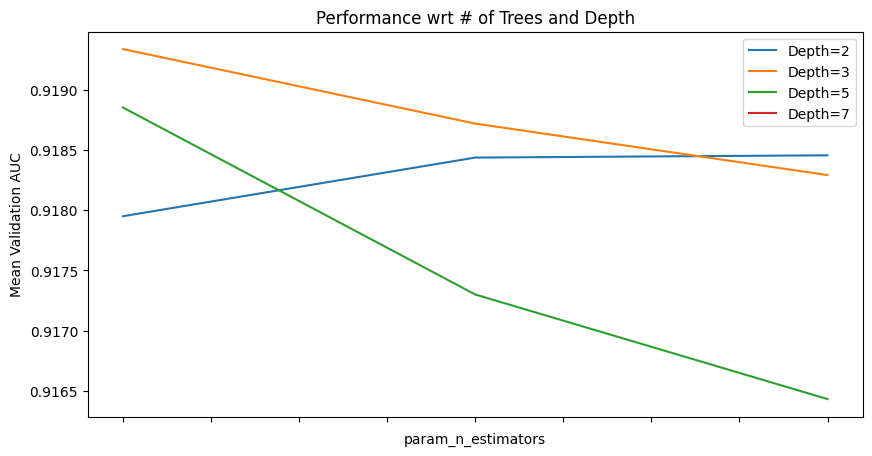

In [ ]:
# First sort by number of estimators as that would be x-axis
df_cv_results.sort_values(by='param_n_estimators', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==2),:]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==3),:]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==5),:]
lr_d7 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==7),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)
lr_d7.plot(x='param_n_estimators', y='mean_test_score', label='Depth=7', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

Text(0.5, 1.0, 'Performance wrt learning rate')

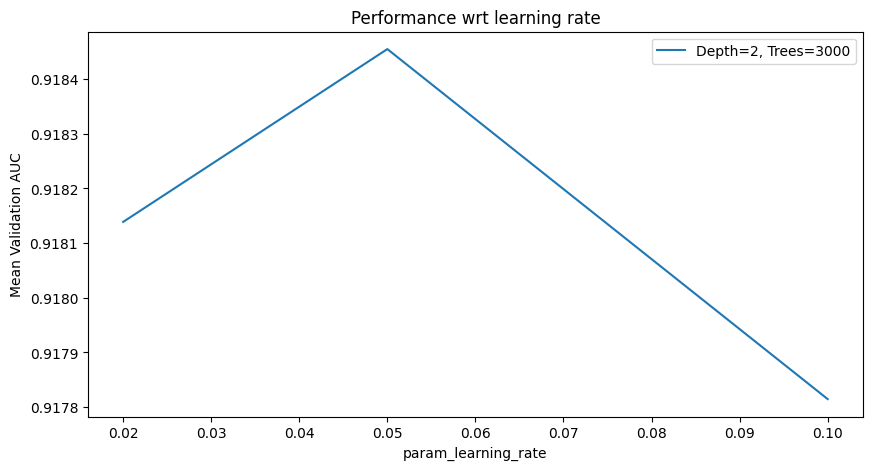

In [ ]:
# First sort by learning rate as that would be x-axis
df_cv_results.sort_values(by='param_learning_rate', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_t3k_d2 = df_cv_results.loc[(df_cv_results['param_n_estimators']==3000) & (df_cv_results['param_max_depth']==2),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='Depth=2, Trees=3000', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

##Final model after tuning

In [ ]:
model_xgboost_fin = xgboost.XGBClassifier(learning_rate=0.02,
                                          max_depth=5,
                                          n_estimators=1000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both
eval_set = [(X_train, y_train),(X_test, y_test)]

model_xgboost_fin.fit(X_train,
                  y_train,
                  early_stopping_rounds=20,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.55173	validation_1-auc:0.53955
[1]	validation_0-auc:0.88562	validation_1-auc:0.88420
[2]	validation_0-auc:0.88686	validation_1-auc:0.88614
[3]	validation_0-auc:0.88912	validation_1-auc:0.88950
[4]	validation_0-auc:0.88883	validation_1-auc:0.88890
[5]	validation_0-auc:0.88920	validation_1-auc:0.88913
[6]	validation_0-auc:0.88974	validation_1-auc:0.88921
[7]	validation_0-auc:0.89009	validation_1-auc:0.88933
[8]	validation_0-auc:0.89347	validation_1-auc:0.89314
[9]	validation_0-auc:0.89384	validation_1-auc:0.89374
[10]	validation_0-auc:0.89358	validation_1-auc:0.89368
[11]	validation_0-auc:0.89367	validation_1-auc:0.89355
[12]	validation_0-auc:0.89496	validation_1-auc:0.89495
[13]	validation_0-auc:0.89524	validation_1-auc:0.89511
[14]	validation_0-auc:0.89513	validation_1-auc:0.89516
[15]	validation_0-auc:0.89537	validation_1-auc:0.89550
[16]	validation_0-auc:0.89554	validation_1-auc:0.89557
[17]	validation_0-auc:0.89567	validation_1-auc:0.89564
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.25, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_train_pred = model_xgboost_fin.predict_proba(X_train)[:,1]
y_test_pred = model_xgboost_fin.predict_proba(X_test)[:,1]

print("AUC Train: {:.4f}\nAUC Test: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_test, y_test_pred)))

AUC Train: 0.9221
AUC Test: 0.9173


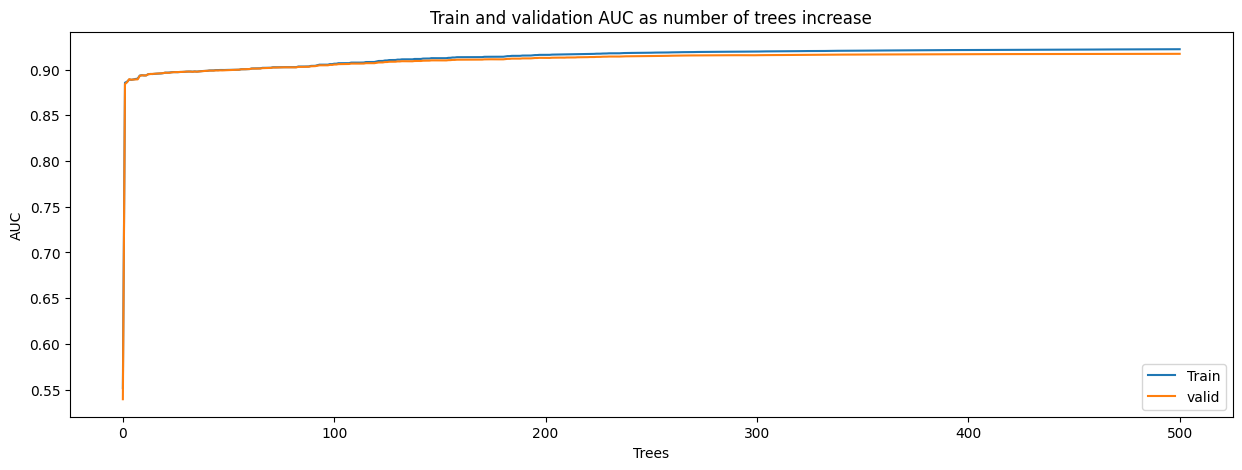

In [ ]:
evaluation_results = model_xgboost_fin.evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = evaluation_results['validation_0']['auc']
test_auc_tree = evaluation_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(test_auc_tree, label='valid')

plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()

##Variable importance

In [ ]:
#df_var_imp = pd.DataFrame({"Variable": X.columns(),
                         #  "Importance": model_xgboost_fin.feature_importances_}) \
                        #.sort_values(by='Importance', ascending=False)
#df_var_imp[:10]

##Logistic Regression

In [ ]:
# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[-0.52628678 -0.52628678  0.20133411 -0.46244289 -3.3494101  -0.52628678]]


[[9.89974523e-01 1.00254769e-02]
 [9.99166074e-01 8.33925929e-04]
 [9.96450286e-01 3.54971406e-03]
 ...
 [9.99864764e-01 1.35236081e-04]
 [7.21428455e-01 2.78571545e-01]
 [9.92886344e-01 7.11365639e-03]]
The model accuracy is 90.17503302509907%


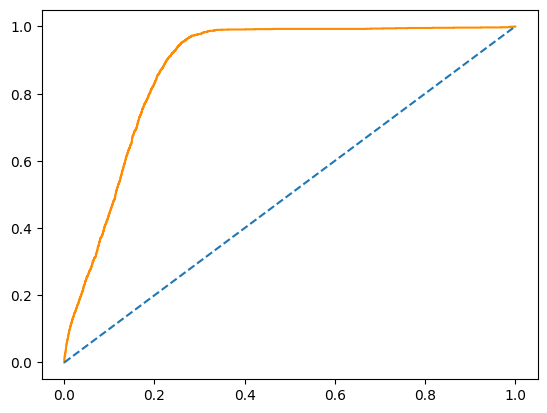

0.8780532631638874

In [ ]:
# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)
print(preds)
# Print the accuracy score the model
print("The model accuracy is %s%%"%(100*clf_logistic.score(X_test, y_test)))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = metrics.roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = metrics.roc_auc_score(y_test, prob_default)
auc

In [ ]:
def lift_curve(probabilities, title = "Model"):

    #First, sort the probabilities in decreasing order
    probabilities = -1*np.sort(-1*probabilities)
    N = np.shape(probabilities)[0]

    #Now, build the three curves for the graph like in the paper
    lift_curve_values = [sum(probabilities[0:(i+1)]) for i in range(N)]
    baseline_values = [((i+1)/N)*lift_curve_values[-1] for i in range(N)]
    best_values = [min(i+1,lift_curve_values[-1]) for i in range(N)]

    #Compute the area between the model curve and the baseline curve
    lift_area = sum([lift_curve_values[i] - baseline_values[i] for i in range(N)])
    best_area = sum([best_values[i] - baseline_values[i] for i in range(N)])
    area_ratio = lift_area/best_area

    print("The area ratio is %s"%(area_ratio))

    plt.title("Lift Curve for %s"%(title))
    plt.xlabel("# of total data points")
    plt.ylabel("# of target data points")

    plt.plot(baseline_values)
    plt.plot(best_values)
    plt.plot(lift_curve_values)

    plt.legend(["Baseline Model","Theoretically Best Model", "Actual Model"])

The area ratio is 0.7589772675459933


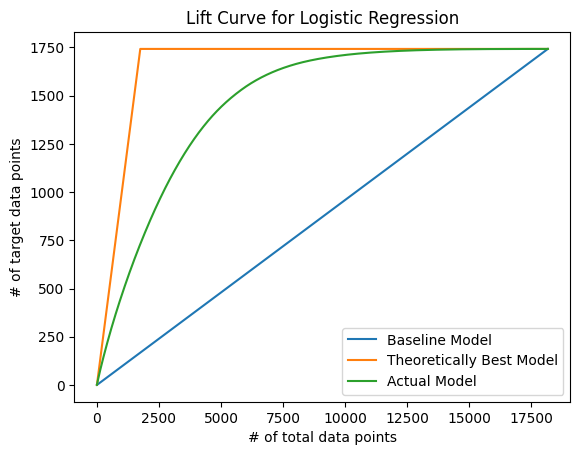

In [ ]:
lift_curve(np.reshape(preds[:,1],(18168,)), "Logistic Regression")

In [ ]:
X['hazardous'] = y
X.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,average_diameter,hazardous
0,3.587284,3.587284,-1.363913,0.795153,-2.348632,3.587284,0
1,0.463529,0.463529,1.009040,1.090357,-1.218735,0.463529,1
2,1.991887,1.991887,2.616983,0.569624,-1.968544,1.991887,0
3,-0.103601,-0.103601,-0.921301,-0.520384,-0.458560,-0.103601,0
4,0.427378,0.427378,-0.210697,0.412001,-1.187637,0.427378,1


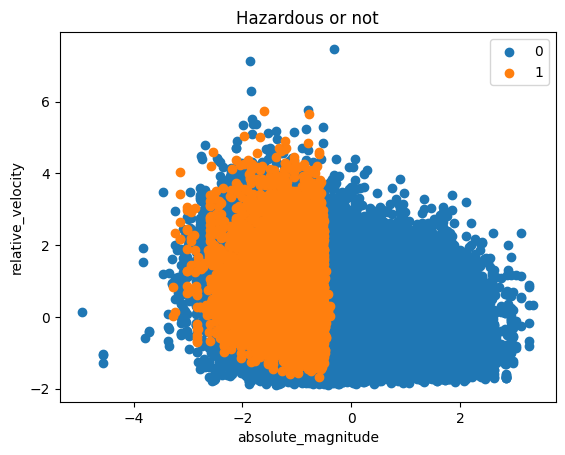

In [ ]:
labels = X['hazardous'].unique()
for i in labels:
  subset = X[X['hazardous'] == i]
  plt.scatter(subset['absolute_magnitude'], subset['relative_velocity'], label=i)

plt.xlabel('absolute_magnitude')
plt.ylabel('relative_velocity')
plt.title('Hazardous or not')
plt.legend()
plt.show()

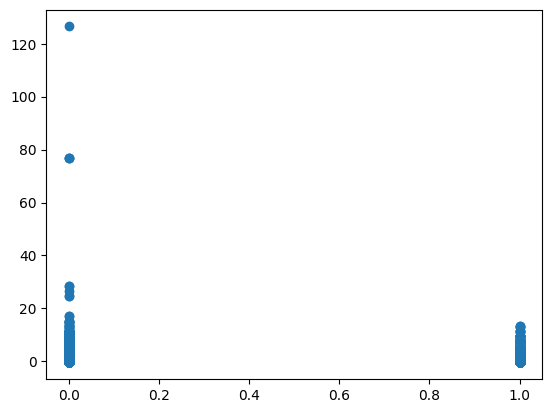

In [ ]:
plt.scatter(X['hazardous'], X['average_diameter'])